# DFT vs FFT
Lets have a look at how much a difference the FFT makes to the computation of the DFT of a signal in terms of processing time of a long sequence.

In [18]:
import numpy as np

#our DFT
def dft(signal):
    '''
    Compute the 1D DFT given signal of length N
    '''
    N, = signal.shape
    w = np.exp(-2.0*np.pi*1j/N) #Nth root of unity
    dftSignal = np.zeros(N, np.complex)
    for n in range(N):
        for k in range(N):
            dftSignal[k] += signal[n]*w**(n*k) #we create the Fourier matrix and do the dot at same time
    return dftSignal

Lets define our test signal as we've done many times before

In [19]:
#define a test signal
#lets reuse the Fourier Transform example
#three waves
freqs = np.array([0.5, 1, 2.0]) #Hz - cycles per second
amplitudes = np.array([1.0, 0.5, 1.5])
time_to_plot = 2 # second
sample_rate = 1024 # samples per second
N = sample_rate * time_to_plot

#create each wave for each member of lists freqs and amplitudes
t = np.linspace(0, time_to_plot, N)
waves = np.array([amplitudes * np.sin(freqs * i * 2*np.pi) for i in t]) #2D array of the waves
print(waves.shape)

#create the signal as a superposition of the waves
signal = np.sum(waves, axis=1)
print(signal.shape)

(2048, 3)
(2048,)


Now compute each algorithm with timings to see how long each computation takes

In [20]:
import time

#compute our DFT
start = time.time()
dftSignal = dft(signal)
end = time.time()
elapsed = end - start
print("DFT took " + str(elapsed) + " secs or " + str(elapsed/60) + " mins in total")

#Numpy FFT
start = time.time()
fftSignal = np.fft.fft(signal)
end = time.time()
elapsed = end - start
print("FFT took " + str(elapsed) + " secs or " + str(elapsed/60) + " mins in total")

DFT took 18.016666412353516 secs or 0.30027777353922525 mins in total
FFT took 0.0 secs or 0.0 mins in total


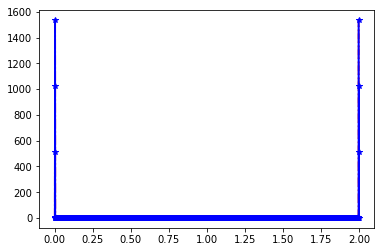

In [21]:
#plot
import matplotlib.pyplot as plt

plt.plot(t, np.abs(dftSignal), '-.r')
plt.plot(t, np.abs(fftSignal), '-*b')
plt.show()

Even for a modest size $N=1024$, the FFT is around 18 times faster with no discernable difference in results!